In [74]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [75]:
# Cargar el dataset en un DataFrame
data = pd.read_csv("housing.csv")

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [76]:

# Cargar el shapefile en un GeoDataFrame
california = gpd.read_file("California_Counties.shp")

# Verificar el CRS de california y asignar si es necesario
if california.crs is None:
    california.set_crs("EPSG:3857", inplace=True)  # Asumiendo que el shapefile está en un CRS proyectado (e.g., Web Mercator)

california

,geometry
0,"MULTIPOLYGON (((-13602253.477 4536144.556, -13..."
1,"POLYGON ((-13347274.736 4711759.133, -13345788..."
2,"POLYGON ((-13366983.072 4680058.246, -13366989..."
3,"POLYGON ((-13514702.077 4887275.447, -13514730..."
4,"POLYGON ((-13366406.546 4651605.021, -13366413..."
5,"POLYGON ((-13592839.121 4781210.043, -13592419..."
6,"MULTIPOLYGON (((-13622392.512 4565508.546, -13..."
7,"MULTIPOLYGON (((-13815976.326 5100276.722, -13..."
8,"POLYGON ((-13347688.733 4712126.052, -13347699..."
9,"POLYGON ((-13247183.896 4518984.771, -13247127..."


In [77]:
# Convertir las coordenadas de latitud y longitud en geometrías Point
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
data_geo = gpd.GeoDataFrame(data, geometry='geometry')

# Verificar el CRS de data_geo y asignar si es necesario
if data_geo.crs is None:
    data_geo.set_crs("EPSG:4326", inplace=True)  # Asumiendo que los puntos están en WGS84

# Transformar CRS de data_geo para que coincida con california
data_geo = data_geo.to_crs(california.crs)

data_geo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-13606581.360 4562487.679)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-13605468.165 4559667.342)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-13607694.555 4558257.461)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-13608807.749 4558257.461)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-13608807.749 4558257.461)
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,POINT (-13479677.140 4790662.546)
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,POINT (-13493035.479 4792104.899)
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,POINT (-13494148.674 4783453.891)
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,POINT (-13505280.623 4783453.891)


In [78]:
# Realizar la unión espacial
data_joined = gpd.sjoin(data_geo, california, how="inner", predicate="within")

data_joined


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry,index_right
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-13606581.360 4562487.679),0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-13605468.165 4559667.342),0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-13607694.555 4558257.461),0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-13608807.749 4558257.461),0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-13608807.749 4558257.461),0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,POINT (-13479677.140 4790662.546),57
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,POINT (-13493035.479 4792104.899),57
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,POINT (-13494148.674 4783453.891),57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,POINT (-13505280.623 4783453.891),57


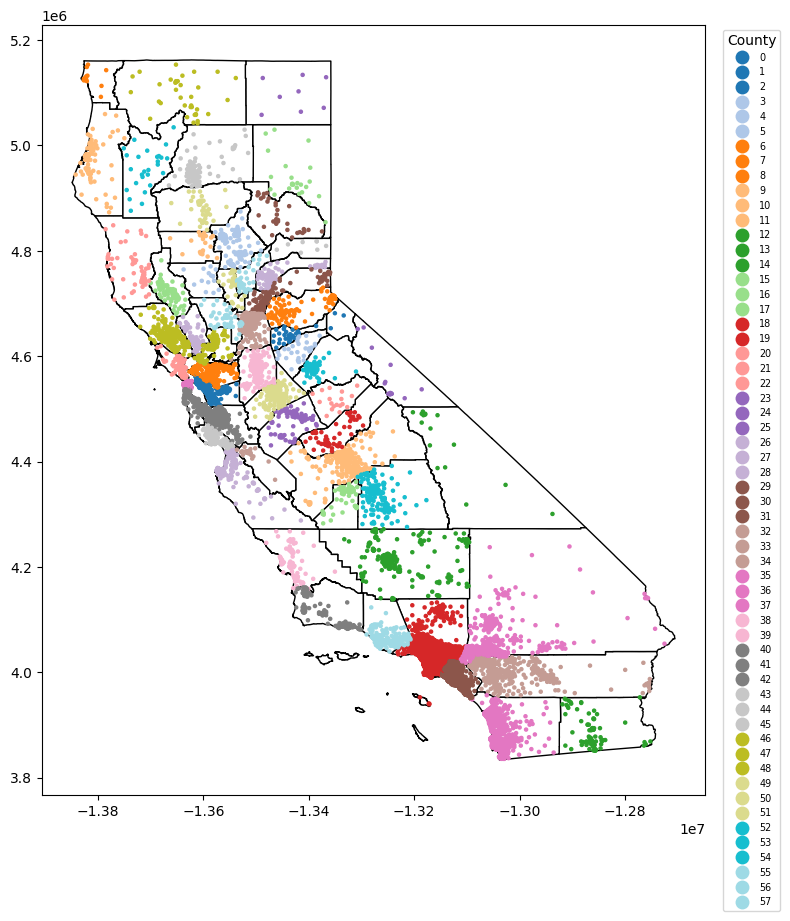

In [79]:
# Plotear los datos
# Asignar colores según index_right utilizando una paleta de colores de Matplotlib
num_categories = len(data_joined['index_right'].unique())
cmap = plt.get_cmap('tab20', num_categories)  # Paleta de colores con suficientes categorías

# Plotear los datos
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear el shapefile de California
california.plot(ax=ax, color='white', edgecolor='black')

# Plotear los puntos de data_joined con colores según index_right
data_joined.plot(ax=ax, column='index_right', categorical=True, legend=True, cmap=cmap, markersize=5, legend_kwds={'title': 'County', 'fontsize': 'x-small', 'bbox_to_anchor': (1.02, 1)})

plt.show()

In [80]:
#Realizamos una limpieza de los datos redundantes o que no aportan información
data_joined = data_joined.drop(columns=['longitude', 'latitude', 'geometry', 'ocean_proximity'])

data_joined = data_joined.rename(columns={'index_right': 'county'})

data_joined = data_joined.dropna()

data_joined

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,county
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,57
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,57
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,57
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,57


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
columns = data_joined.select_dtypes(include=['float64', 'int64'])


# Ajustar y transformar los datos
data_normalized[columns.columns] = scaler.fit_transform(columns)

data_normalized.corr()
# # Separar las características (variables independientes) y la variable objetivo (precio de la vivienda)
# X = data_joined[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'county']]
# y = data_joined['median_house_value']


# # Normalizar las características
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Inicializar el modelo de regresión lineal
# model = LinearRegression()

# # Entrenar el modelo con los datos de entrenamiento
# model.fit(X_train, y_train)

# # Realizar predicciones sobre los datos de prueba
# y_pred = model.predict(X_test)

# # Calcular el error cuadrático medio (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Error cuadrático medio (MSE):", mse)

# # También puedes ver los coeficientes de regresión
# coefficients = model.coef_
# intercept = model.intercept_
# print("Coeficientes de regresión:", coefficients)
# print("Término independiente:", intercept)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'